In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
datasetGafisa = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/GFSA35A.csv')
datasetHelbor = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/HBOR35A.csv')
datasetMRV = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/MRVE35A.csv')
datasetRossi = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/RSID35A.csv')
datasetTrisul = pd.read_csv('C:/Users/Lapin/Documents/Pytest/dados/TRIS35A.csv')

In [25]:
datasetGafisa['Date'] = pd.to_datetime(datasetGafisa['Date'])
datasetHelbor['Date'] = pd.to_datetime(datasetHelbor['Date'])
datasetMRV['Date'] = pd.to_datetime(datasetMRV['Date'])
datasetRossi['Date'] = pd.to_datetime(datasetRossi['Date'])
datasetTrisul['Date'] = pd.to_datetime(datasetTrisul['Date'])

In [21]:
#Aplicando as médias móveis
datasetTrisul = pd.DataFrame(datasetTrisul[['Close','Date']])
datasetTrisul.set_index('Date', inplace=True)
datasetTrisul['MM_8'] = datasetTrisul['Close'].rolling(8).mean().shift() 
datasetTrisul['MM_21'] = datasetTrisul['Close'].rolling(21).mean().shift()

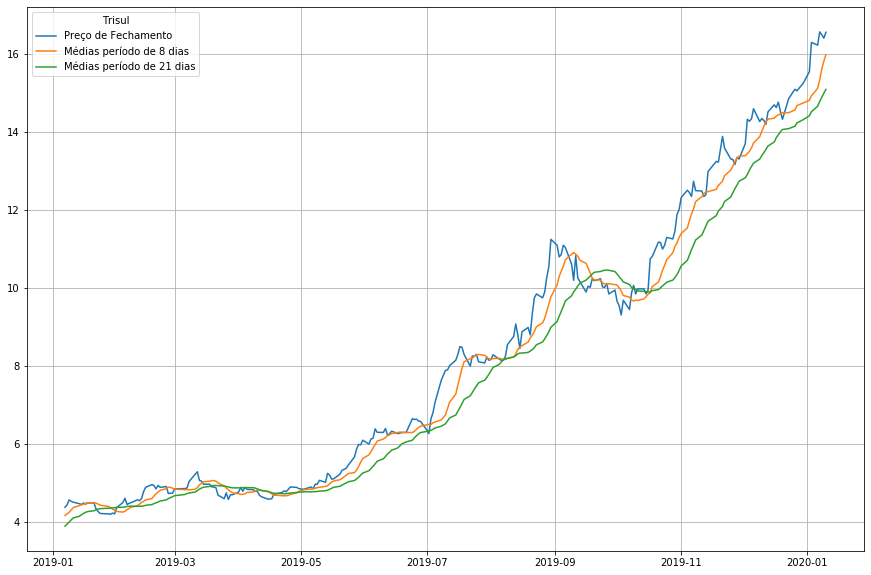

In [22]:
#Visualizando a média móvel, dentro de um período de 252 dias.

limit = 252
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(datasetTrisul['Close'][-limit:], label='Preço de Fechamento')
plt.plot(datasetTrisul['MM_8'][-limit:], label='Médias período de 8 dias')
plt.plot(datasetTrisul['MM_21'][-limit:], label='Médias período de 21 dias')
plt.legend(loc=2)
plt.legend(title = "Trisul")
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
treino = datasetTrisul
dados = ['Open','High','Low','Volume']
treino = treino[dados]
y = datasetTrisul['Close']

In [55]:
X_treino, X_teste, y_treino, y_teste = train_test_split(treino, y,random_state=42)

In [56]:
#Criando um objeto do tipo LinearRegression
meu_modelo = LinearRegression()
#Treinando o modelo utilizando o método fit
meu_modelo.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
meu_modelo.coef_

array([-4.48276771e-01,  9.17175839e-01,  5.27815860e-01,  1.34205347e-09])

In [58]:
meu_modelo.predict(X_teste)[:20]

array([ 1.595763  ,  6.39958899,  1.34912137,  2.47183953,  1.27654581,
        1.43924577,  2.6899086 ,  1.48140664,  1.44921372,  1.33957427,
       10.34234107,  2.02132299,  1.32659424,  1.43924577, 10.36534079,
       14.65270287,  4.56407234,  2.66150142,  5.15676378,  8.24447097])

In [59]:
y_teste[:20]


680      1.570
1102     6.300
394      1.360
930      2.480
497      1.270
462      1.445
950      2.700
81       1.475
43       1.455
128      1.345
1170    10.170
743      2.010
513      1.330
461      1.445
1167    10.200
1239    14.860
1050     4.600
945      2.680
1043     5.050
1139     8.170
Name: Close, dtype: float64

In [32]:
#Validando o modelo Gafisa
RMSE = mean_squared_error(y_teste, meu_modelo.predict(X_teste))**0.5
RMSE

0.19837451959307795

In [39]:
#Validando o modelo Helbor
RMSE = mean_squared_error(y_teste, meu_modelo.predict(X_teste))**0.5
RMSE

0.03110938042748571

In [46]:
#Validando o modelo MRV
RMSE = mean_squared_error(y_teste, meu_modelo.predict(X_teste))**0.5
RMSE

0.1220641950009368

In [53]:
#Validando o modelo Rossi
RMSE = mean_squared_error(y_teste, meu_modelo.predict(X_teste))**0.5
RMSE

0.13010109196730807

In [60]:
#Validando o modelo Trisul
RMSE = mean_squared_error(y_teste, meu_modelo.predict(X_teste))**0.5
RMSE

0.0499550501454529